In [2]:
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
import math

def tricoords(x, y, width):
    return ((x, y), (x+width, y), (x+width/2, y+width*math.sqrt(3)/2))

def tricornsplit(x, y, width):
    return ((x, y), (x+width/2, y), (x+width/4, y+width*math.sqrt(3)/4))

def tricornsplitlevels(x, y, width, n):
    tris = [(x, y)]
    for i in range(n):
        ntris = [ ]
        for tx, ty in tris:
            ntris.extend(tricornsplit(tx, ty, width))
        width = width/2
        tris = ntris
    return tris

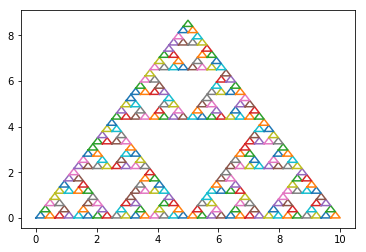

In [4]:
width = 10
n = 5
tris = tricornsplitlevels(0,0,width,n)
twidth = width/(2**n)
for tx, ty in tris:
    tc = tricoords(tx, ty, twidth)
    plt.plot([tc[0][0], tc[1][0], tc[2][0], tc[0][0]], [tc[0][1], tc[1][1], tc[2][1], tc[0][1]])


In [6]:
svgtemplate = """<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   width="1510mm"
   height="1597mm"
   viewBox="-100 -100 1510 1597">
    {stris}
</svg>
"""

def svgtri(x, y, width):
    tc = tricoords(x, y, width)
    d = "M%.3f,%.3fL%.3f,%.3fL%.3f,%.3fZ" % (tc[0][0], tc[0][1], tc[1][0], tc[1][1], tc[2][0], tc[2][1])
    return """<path
       style="opacity:1;fill:none;stroke:#007c00;stroke-width:0.5;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       d="%s" />\n""" % d

outerwidth = 1120
n = 9
width = outerwidth - 2*math.sqrt(3)*3
svgtris = [ ]
svgtris.append(svgtri(0, 0, outerwidth))
tris = tricornsplitlevels(math.sqrt(3)*3, 3, width, n)
twidth = width/(2**n)
for tx, ty in tris:
    tc = tricoords(tx, ty, twidth)
    svgtris.append(svgtri(tx, ty, twidth))
    
fout = open("test5.svg", "w")
stris = "".join(svgtris)
fout.write(svgtemplate.format(stris=stris))
fout.close()


In [7]:
# with fill
svgtemplate = """<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   width="1510mm"
   height="1597mm"
   viewBox="-100 -100 1510 1597">
    {stris}
</svg>
"""

def svgtri(x, y, width):
    tc = tricoords(x, y, width)
    d = "M%.3f,%.3fL%.3f,%.3fL%.3f,%.3fZ" % (tc[0][0], tc[0][1], tc[1][0], tc[1][1], tc[2][0], tc[2][1])
    return """<path
       style="opacity:1;fill:#000000;stroke:none;stroke-width:0.5;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       d="%s" />\n""" % d

def svgtriwhite(x, y, width):
    tc = tricoords(x, y, width)
    d = "M%.3f,%.3fL%.3f,%.3fL%.3f,%.3fZ" % (tc[0][0], tc[0][1], tc[1][0], tc[1][1], tc[2][0], tc[2][1])
    return """<path
       style="opacity:1;fill:#ffffff;stroke:none;stroke-width:0.5;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       d="%s" />\n""" % d

outerwidth = 1120
n = 3
width = outerwidth - 2*math.sqrt(3)*3
svgtris = [ ]
svgtris.append(svgtriwhite(0, 0, outerwidth))
tris = tricornsplitlevels(math.sqrt(3)*3, 3, width, n)
twidth = width/(2**n)
for tx, ty in tris:
    tc = tricoords(tx, ty, twidth)
    svgtris.append(svgtri(tx, ty, twidth))
    
fout = open("newfile.svg", "w")
stris = "".join(svgtris)
fout.write(svgtemplate.format(stris=stris))
fout.close()

